# Sampling Distributions & Probability


This lab / homework is about sampling, sampling distributions and probability. You will work with these concepts in this Notebook. 

## Assignment Goals
 - Develop familiarity with sampling distributions (e.g., their creation, visualizations, how changing parameters changes resulting distributions).
 - Understand how to use elements of probability theory to predict outcomes and understand a sample space.

First, you will practice building a Sampling Distribution of Sample Means and a Sampling Distribution of Sample Standard Deviations. You will visualize both distributions and examine their properties. You will then look at some sample distributions on your own and see how changing the sample parameters alters the shape of these distributions. In the second half of the Notebook, you will start to work a bit with probability distributions. 




## Sampling and Sampling Distributions


We will take a look at the differences between *sample* distributions and *sampling* distributions.

### Monte Carlo Sampling

This lab starts with a technique called Monte Carlo sampling. We will sample from a hypothetical population that has several parameters: a form or shape (we will use a normally distributed population), with a specified mean, and a specified standard deviation.

Let's start by making and plotting a sample. Generate some Python code to take a random sample of 50 participants, from a population with a mean of 100 and a standard deviation of 20. Store the sample values in an array. We are going to do this with a loop. Before beginning, please run the code block below that contains the import statements you will need. 

In [3]:
# Import statements

import random # Because we will be drawing some random numbers, we will import Python's 'random' library. 
import numpy as np # We'll be using numpy so this is also being imported.
import matplotlib.pyplot as plt # Here is the import command for matplotlib (our plotting library).

In [5]:
# Generate your sample.

a = np.empty(50)
for i in range(50):
    a[i] = random.gauss(mu=100, sigma=20)


In [6]:
# Use print statementments to check if your code is correct.
print(f'a = {a}')
print(f'There are {len(a)} values in the sample.')

a = [ 90.90347939  80.93345092 124.95383083 121.69381635  67.48953626
 129.99391122  94.08988506 138.52323192  86.03958339 106.20553946
  62.25955219  95.74826802 134.94402657  89.9565205  122.27470461
  83.00762064 104.00046108 104.79185178  90.05237578 106.30625117
  90.24833737  99.93699686  76.90110512 106.15021835 109.30170482
  93.11818755  99.85523826  71.23159973  92.66207607 145.6831851
  79.53639387  90.82553221 112.93631174 103.27241063 107.3380636
 120.51848762  93.91081024 100.14059496  53.48148815 100.09798211
 126.87355247  90.80958451 131.27045231 118.18163141 119.72288928
  85.60521052  93.02732462  68.47259529 137.22547543 127.34751659]
There are 50 values in the sample.


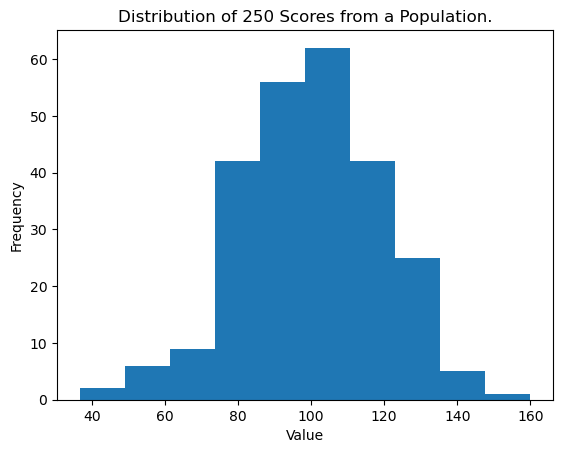

In [76]:
# Plot your sample's distribution using a histogram.

plt.hist(a)
plt.title(f'Distribution of {len(a)} Scores from a Population.')
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.show()

### <font color="blue"> *Homework Problem 1a*</font>

Last lab, you learned how to calculate the mean and standard deviation of a sample in Python. In the code cell below, calculate these values for the array you plotted above. Use a print statement to report your results. Feel free to use numpy if you wish! Starting today, when we compute **sample** variance/standard deviation, we will use Bessel's correction (n-1) in the denominator. In numpy, we do that by adding the code ', ddof=1' to the numpy.std() command. Hint: it will look something like 'np.std(your_variable_name, ddof=1)'. If you are doing the calculation on your own, use len(data)-1. When you have your values printed, see how close they are to the population mu (100) and sigma (20)? Consider why they might be different. Finally, answer the questions in the text box below.

In [73]:
# Calculate the mean and standard deviation of the array and print these values.

a_mean = sum(a) / len(a)
a_sd = np.std(a, ddof=1)

print(f'The mean of the array is {a_mean}.')
print(f'The standard deviation of the array (using Bessel\'s correction) is {a_sd}.')

The mean of the array is 102.02807233315909.
The standard deviation of the array (using Bessel's correction) is 20.529425819167404.


### <font color="blue"> *Homework Problem 1b*</font>

1) Is this a sample distribution or a sampling distribution? How do you know?

ANSWER: This is a sample distribution because it is the distribution of samples from a population. If the distribution was formed of the sample mean, it would be a sampling distribution instead. By this, I mean that I would have had to calculate the statistics on multiple samples and plot the mean (or standard deviation, etc...) instead of the way the values from the sample are plotted.

2) Why didn't your array's mean/standard deviation match the population mu/sigma? What would you have to do make your array's mean/standard deviation more likely to be a closer match?

ANSWER: My array's mean/standard deviation did not match the population mu/sigma because a sample is not always completely accurate to a population. This is called sampling variability. A sample is only an approximation of a population, which means the descriptive statistics will not be exactly the same as the population's statistics. To make my array's mean/standard deviation more likely to be a closer match, I would increase the sample size, because as sample size increases, the values converge about the population statistics.

3) What type of population is being sampled?

ANSWER: The type of population being sampled is a hypothetical population, with mu of 100 and sigma of 20. This means the amount of objects in the population is not available in a solid form. This population is also normally distributed, found by using the random.gauss function (Gaussian distributions are the same as normal distributions), thereby giving us a normal distribution. This is evident when looking at the histogram above, because it appears to follow a normal curve. 


 
 
 
Next, we want to do some more sampling. If you want some more practice with drawing individual samples, pause now and rerun the code above. Try the same sample size again, resample and plot your new histogram. Try a smaller sample size (e.g., 25), and a bigger one (e.g., 250). Have a look at how simply changing the sample size changes both the distribution and a sample's mean/standard deviation.

When you are ready to move on, restart your video and continue following along below.

In [7]:
# Let's now write a function to take repeated samples (because obviously, the benefit of using code 
# instead of working by hand is that the computer can do the boring work instead of you). To do this
# we will start by defining a 'function' to take a single sample. We will call it 'sample_one'.
# Be sure you understand what this code is doing so that you can run it on your own in future labs & homeworks. 
#
# Execute this cell to ensure that the code is activated.

def sample_one(mu, sigma, sample_size):
    """A function to take a single sample from a normally-distributed population.
    Input:  mu, the population mean
            sigma, the population standard deviation
            sample_size, an integer value indicating the sample size to use
    Return: this_sample, an array containing the values you sampled.
    """
    this_sample = np.empty(sample_size) 
    for i in range(sample_size):
        this_sample[i] = random.gauss(mu, sigma)
    return this_sample 

Now, we need to make a call to this function. We are going to do that in a loop, so that the function is called many times. This is how you will build your first sampling distribution. It will be a sampling distribution of sample means (DOSM). Here are the steps in building a DOSM using Monte Carlo sampling. 

1. Define your population parameters (e.g., mu and sigma). 

2. Select your sample size.

3. Select the number of samples you will take.

4. Take a sample.

5. Compute and store the sample mean.

6. Repeat steps 4 & 5 lots of times (once for each sample)

7. Plot a histogram of the sample means.

Let's get started by making the Monte Carlo function we need.

In [8]:
# Define the Monte Carlo function here.

def my_monte_carlo_function(pop_mean, pop_sd, n, iterations):
    """A function to take Monte Carlo samples, compute their mean, and return an array of sample means.
    Input: pop_mean, the population mean
           pop_sd, the population standard deviation
           n, the size of each indivdual sample
           iterations, the number of samples to take
    Return: sample_means, an array of sample means.
    """
    sample_means = np.empty(iterations)
    for i in range(iterations):
        sample_means[i] = np.mean(sample_one(pop_mean, pop_sd, n))
    return sample_means

Now we need to make a call to the Monte Carlo function to run it and get the output. First, we need to define the input varaibles. Then, we will make that function call in the code cell below and plot a histogram of the results. In addition, we will print the mean and standard deviation of the DOSM and see how it compares to the population mu (should be about the same) and sigma (should be much smaller - why?). 

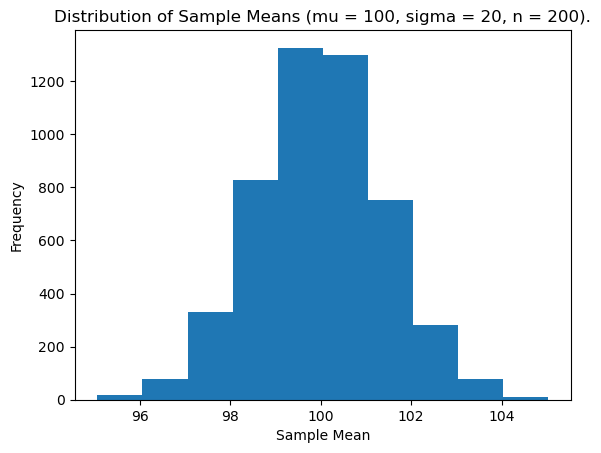

The mean of the DOSM is: 99.9863.
The standard deviation of the DOSM is: 1.4224.


In [9]:
# Variable definitions here.
mu = 100
sigma = 20
sample_size = 200
number_samples = 5000

# Function call here.
my_dosm = my_monte_carlo_function(mu, sigma, sample_size, number_samples)

# Results here.
plt.hist(my_dosm)
plt.title(f'Distribution of Sample Means (mu = {mu}, sigma = {sigma}, n = {sample_size}).')
plt.ylabel('Frequency')
plt.xlabel('Sample Mean')
plt.show()

print(f'The mean of the DOSM is: {np.mean(my_dosm):.4f}.')
print(f'The standard deviation of the DOSM is: {np.std(my_dosm):.4f}.') 

You have now made your first sampling distribution (of sample means). Remember that we can use this same technique to build a sampling distribution of any statistic. For this exercise, we used Monte Carlo sampling methods to sample from a population whose parameters (mu and sigma) we specified. We can also use bootstrap sampling to re-sample and build a distribution from data that we have already collected (we will do that another week). 

### <font color="blue"> *Homework Problem 2a*</font>

Now that you have made a DOSM, you should be able to make a very small edit to the Monte Carlo function above and have it give you an array of sample standard deviations instead of an array of sample means. If you don't remember what the Monte Carlo function does, go back and review the video walk-through. Once you have the code changed, execute the code to activate your change and then, in the code cell below, make a call to the function, plot the resulting distribution, and calculate/print its mean and standard deviation. 

In addition to producing a DOSD, please also change the 'sample_one' code to change the distribution you are randomly sampling from a Gaussian to a UNIFORM distribution. 


In [10]:
# Define the edited sampling function here so that it samples from a uniform distribution. If you need help
# read the docs: https://python.readthedocs.io/en/latest/library/random.html
# (copy, paste and edit - be sure to change the function name so that you don't over-write the function above).

def sample_two(low, high, sample_size):
    this_sample = np.empty(sample_size) 
    for i in range(sample_size):
        this_sample[i] = random.uniform(low, high)
    return this_sample 

# Define the edited Monte Carlo function here (copy, paste and edit - be sure to change the function name so that
# you don't over-write the function above).

def my_monte_carlo_function_two(floor, ceiling, n, iterations):
    sample_sds = np.empty(iterations)
    for i in range(iterations):
        sample_sds[i] = np.std(sample_two(floor, ceiling, n), ddof = 1)
    return sample_sds


# ** NOTE: If you overwrite the functions that were originally defined above by accident, you will 
# get wrong answers in other problems for this assignment. 

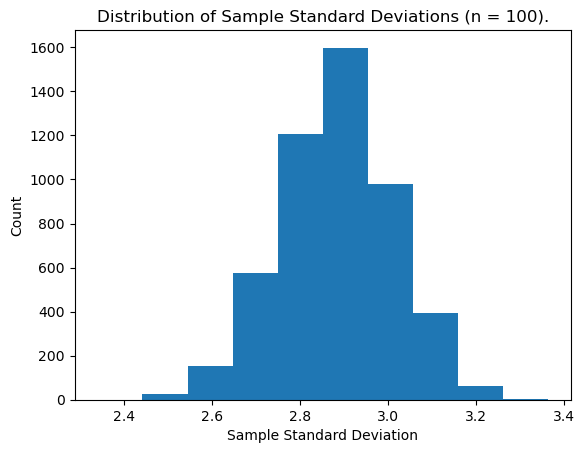

The mean of the DOSD is: 2.8826.
The standard deviation of the DOSD is: 0.1293.


In [11]:
# Call the edited function, plot the result and print the mean/standard deviation. Use the values 0 and 10 for the 
# lower and upper boundaries of your uniform distribution. Define the other parameters as needed.
# Variable definitions here.
n = 100
iterations = 5000

# Function call here.

my_dosd = my_monte_carlo_function_two(0, 10, n, iterations)

# Results here.
plt.hist(my_dosd)
plt.title(f'Distribution of Sample Standard Deviations (n = {n}).')
plt.ylabel('Count')
plt.xlabel('Sample Standard Deviation')
plt.show()

print(f'The mean of the DOSD is: {np.mean(my_dosd):.4f}.')
print(f'The standard deviation of the DOSD is: {np.std(my_dosd):.4f}.') 

### <font color="blue"> *Homework Problem 2b*</font>

Does the distribution produced by this sampling process look like it came from a uniform distribution? Why or why not? Answer in the markdown cell below.


The distribution produced by this sampling process does not look like it came from a uniform distribution. A uniform distribution appears to have similar values all across, which does not resemble the histogram above. This is because the graph above has closer to a normal distribution, with a peak of values in the middle and less on the ends, and I would have expected the graph to be more uniform, to reflect the distribution it was sampled from. 


### <font color="blue"> *Homework Problem 3a*</font>

In this problem, your job is to get some practice with sample distributions and how changing various population parameters changes the probability density function of the resulting sample. Three paramters are defined in the code block below (population mu = 100; population sigma = 15; & sample size = 100).
The code cell below contains code that is ready to run. Run it and examine the histogram it produces. Then edit, one-at-a-time, the following three parameters (execute the cell several times at each value to resample the code):

- population mu (try at least three values from 0 to 200)
- population sigma (try at least four values from 0 to 20)
- sample size (try at least five values from n = 10 to n = 200)

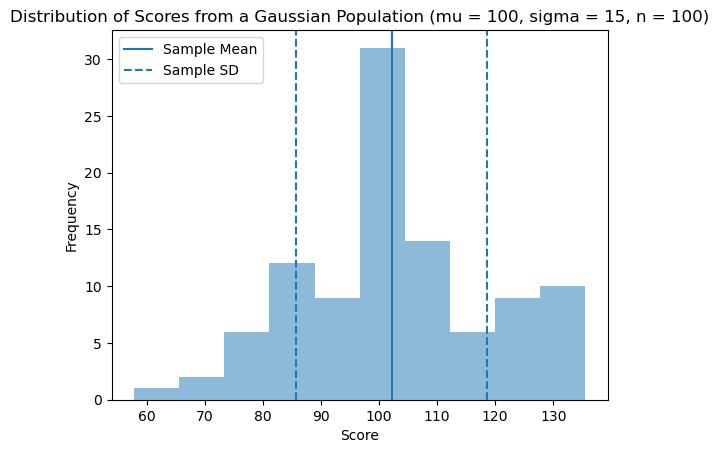

In [12]:
population_mu = 100
population_sigma = 15
sample_size = 100

current_sample = sample_one(population_mu, population_sigma, sample_size)
plt.hist(current_sample, alpha=.5)
plt.title(f'Distribution of Scores from a Gaussian Population (mu = {population_mu}, sigma = {population_sigma}, n = {sample_size})')
plt.axvline(np.mean(current_sample), label='Sample Mean')
plt.axvline((np.mean(current_sample) - np.std(current_sample, ddof=1)), linestyle='dashed', label='Sample SD')
plt.axvline((np.mean(current_sample) + np.std(current_sample, ddof=1)), linestyle='dashed')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.legend()
plt.show()

### <font color="blue"> *Homework Problem 3b*</font>

Now, you know that this code draws from a normal distribution. Do the distributions look normal? How does increasing the value of each parameter change the resulting distribution? 

Type your answer in the box below.

YOUR ANSWER HERE.

 - Mu: Increasing the value of mu did not make the distribution appear more or less normal. The distribution sometimes looked similar to a normal distribution, but other times, looked just like a random distribution. The only change this made was to shift the most frequent value left or right along the x-axis. 
 
 
 - Sigma: Increasing the value of sigma made the distribution appear less like a normal distribution. The smaller the value of sigma, the more the distribution appeared to resemble a normal distribution. This made the distribution become wider by increasing the variability. With a large sample size, the distribution appears more normal. With a smaller sample size, the distribution appears less normal.
 
 
 - Sample size: Increasing the sample size makes the distribution appear closer to a normal distribution. Very small sample sizes made the distributions appear almost uniform.
 
 

# 

# Probability

The next part of this lab will examine probability. We will be calculating the likelihood of events occuring, given a sample space. If we were doing this exercise in person, I would give you a sample of some M&Ms for this lab. Unfortunately, we're online, so we'll need to pretend for today. In the code cell below, I've written some code that will randomly sample some M&Ms from a population of these candies. Execute the code to select your sample. Your sample of candy will contain M&Ms of a variety of colours (the possible colours are: red, blue, green, yellow, orange, brown). That means that your sample space (recall what that is from lecture) consists of these colours. **Note: the sample of M&Ms that your computer draws will be different (in terms of the number of each colour) to the sample my computer draws - please don't worry about this!**

Here are your M&Ms: ['Yellow', 'Green', 'Red', 'Orange', 'Red', 'Blue', 'Green', 'Red', 'Red', 'Green', 'Yellow', 'Green', 'Yellow', 'Green', 'Green', 'Blue', 'Blue', 'Yellow', 'Blue', 'Blue', 'Green', 'Red', 'Red', 'Red', 'Yellow', 'Red', 'Red', 'Blue']

Here is a histogram your M&Ms, by colour (for easier counting):


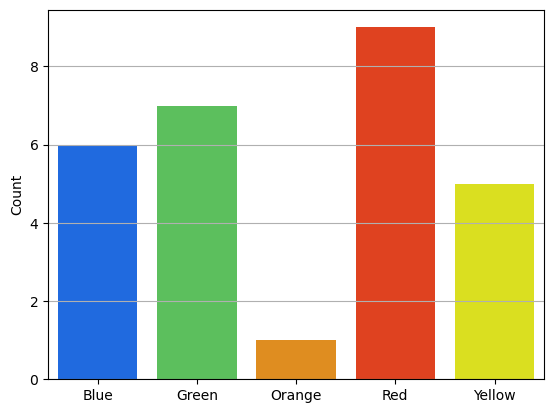

In [30]:
n = np.random.randint(17, 30)
c = ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Brown']
s = random.choices(c, k=n, weights=[random.randint(1, 9), random.randint(1, 9), random.randint(1, 9), random.randint(1, 9), random.randint(1, 9), random.randint(1, 9)])
print(f'Here are your M&Ms: {s}')
labels, counts = np.unique(s,return_counts=True)
i = 0
m_and_ms = dict()
for label in labels:
    m_and_ms[label] = counts[i]
    i += 1
print(f'\nHere is a histogram your M&Ms, by colour (for easier counting):')
import seaborn as sns
palette = {'Blue': '#0063ff', 'Brown': '#6E2C00', 'Red': '#Ff2d00', 'Green': '#4bd04d', 'Yellow': '#F8ff00', 'Orange': '#Ff9200'}
ax = sns.barplot(x = list(m_and_ms.keys()), y = list(m_and_ms.values()), palette=palette)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_ylabel('Count')
plt.show()

Let's start by calculating the distribution of your sample. This will allow you to determine the probability of each event in your sample space. To simplify this idea, we will think about this in the context of a random draw of a single M&M. Basically, we want to figure out the chance of randomly drawing an M&M of each colour, given your sample.

To calculate the probability of drawing, for example, a blue M&M, we need to know how many blue M&Ms there are and how many M&Ms are in the sample altogether. Let's begin by counting them. The sample of M&Ms is in a variable I have called 's'. Recall from last lab that we used the 'len()' command to get the number of data points in a list. In the cell below, we will use that command get the length of s.

In [31]:
total_candy = len(s)
print(f'There are {total_candy} M&Ms in the sample.')

There are 28 M&Ms in the sample.


Now that we know how many candies we have, let's now find out how many M&Ms of each colour we have so that we can calculate the probability of drawing each one. The distribution of M&Ms in your sample will be different from everyone else's - so the code we write below will generate different numbers for you than it does for me. That's ok! 

To make the histogram you see above, I placed each of your M&Ms into a type of variable we haven't talked about yet. It's called a "dictionary". In a real-life dictionary, each item consists of a word and its definition. Here, each item consists of a candy colour and the number of candies there are of that colour in your sample of candies. Print the dictionary below so you can see what this looks like (the dictionary is called 'm_and_ms'). The numbers should match what you see in the histogram. 

In [32]:
print(m_and_ms)

{'Blue': 6, 'Green': 7, 'Orange': 1, 'Red': 9, 'Yellow': 5}


Now what we need to do is to divide each of these numbers by the total number of M&Ms. We will do this in a loop using the candy colour to index our dictionary (if you don't remember what an index is, go back and have a quick look at the indexing section in the previous lab).

In [33]:
for candy_colour in m_and_ms:
    print(f'The proportion of {candy_colour} M&Ms in the sample is: {m_and_ms[candy_colour] / total_candy:.2f}')

The proportion of Blue M&Ms in the sample is: 0.21
The proportion of Green M&Ms in the sample is: 0.25
The proportion of Orange M&Ms in the sample is: 0.04
The proportion of Red M&Ms in the sample is: 0.32
The proportion of Yellow M&Ms in the sample is: 0.18


Now select a specific candy color. Here are the rules: choose your favourite color of M&M that occurs at least 3 or more times in your sample. In the markdown cell below, name the candy colour that you will be choosing.

Candy colour: Blue

Now, print the proportion of times a random draw (with replacement) would give you that M&M colour (hint: it is already printed above - so in the code cell below, we want to figure out how to print the count of your chosen colour from our dictionary).

In [34]:
print(f'The proportion of BLUE M&Ms in the sample is: {m_and_ms["Blue"]} divided by {total_candy} = {m_and_ms["Blue"] / total_candy:.2f}')

The proportion of BLUE M&Ms in the sample is: 6 divided by 28 = 0.21


Success! The candy you randomly selected was one of the ones you were hoping for. What's the chance that your next draw is the same colour? 

In my case, what's the likelihood of picking a second blue candy, after I've already drawn a first one. In probability terms, that's the conditional probability of picking a blue candy, given that I've already picked a blue candy or P(Blue | Blue). 

Well, that will depend on whether I eat the M&M (the likelihood of the second event will depend on the first event) or toss it back into the sample (the likelihood of the second event will be independent of the first event). If this idea is confusing, go back to the lecture and have a quick review of the what it means for events to be independent versus dependent. 

In the code cells below, we will compute the conditional probability of 2 blue M&M selections in a row. We'll start with a quick review.

Conceptually, if two events are independent, knowing something about the likelihood of one event tells us nothing about the likelihood of another. 

Here is an example. If I commute to work on foot nearly every single day (rain or shine), knowing whether it's raining or sunny today is not going to affect the likelihood that I will walk to work (I nearly always walk). These events (me walking and the current weather) are independent. If I'm a fair-weather walker, I only walk to work when it's sunny, then knowing whether it's raining or sunny today IS going to affect the likelihood that I will walk to work, such that the likelihood that I walk to work will increase as the weather becomes nicer. These events are dependent.

 
### <font color="blue"> *Homework Problem 4*</font>

Answer the following questions in the markdown cell below.

If I eat my first blue M&M, what will that do to the total number of M&Ms in my sample and to the number of blue M&Ms in my sample? Will that change the proportion of remaining blue M&Ms? How about if I toss the candy back into the dish (this is called sampling with 'replacement')?

If you eat your first blue M&M, the total number of M&Ms in the sample will decrease by one. The same will happen to the number of blue M&Ms in the sample. This will change the proportion of remaining blue M&Ms (for example, 7/29 = 0.23, but 6/28 = 0.21). If the candy is tossed back into the dish, none of the above will change (the total number, the number of blue M&Ms, the proportion).



Let's try the independent calculation below. Before we do that, we will have a look at our candy to check the values (don't forget that if you are looking at a candy colour that is not blue, you'll need to substitute that candy colour into the equations as needed).

Start by refreshing the lecture so that you know what the correct equation is.

$$ P(A|B) = P(A and B) / P(B) $$

For independent events, the joint probability of both events is simply: $$ P(A and B) = P(A) * P(B) $$

In [35]:
# Start by reminding ourselves about what the variables are.
# These are our original values, before we selected the first blue candy.

print(f'The total number of candies is: {total_candy}.')
print(f'The total number of Blue candies is: {m_and_ms["Blue"]}.')
print(f'The probability of selecting a Blue candy in a random pick is: {m_and_ms["Blue"] / total_candy:.2f}.')
print(f'We will make this number a variable: "p_blue" and round it to 2 decimal places (for simplicity).')
p_blue = round(m_and_ms["Blue"] / total_candy, 2)

The total number of candies is: 28.
The total number of Blue candies is: 6.
The probability of selecting a Blue candy in a random pick is: 0.21.
We will make this number a variable: "p_blue" and round it to 2 decimal places (for simplicity).


In [36]:
# Now, if we replace the candy (we toss it back into the sample), our values are the same as above.

print(f'The original probability of a blue candy was: {p_blue}.')
print(f'Because the numbers have not changed, the probability of blue on the next pick is (still): {p_blue}.')
print(f'When two events are independent, their probabilities for occurring are unrelated.')
print(f'Plugging the numbers into the formula, we get: P(blue2|blue1) = (P(blue2) * P(blue1)) / P(blue1) = {(p_blue * p_blue) / p_blue}.')
print(f'\nWhen events are independent, the probability of one event given another is simply the probability of \nthe original event.')


The original probability of a blue candy was: 0.21.
Because the numbers have not changed, the probability of blue on the next pick is (still): 0.21.
When two events are independent, their probabilities for occurring are unrelated.
Plugging the numbers into the formula, we get: P(blue2|blue1) = (P(blue2) * P(blue1)) / P(blue1) = 0.20999999999999996.

When events are independent, the probability of one event given another is simply the probability of 
the original event.


### <font color="blue"> *Homework Problem 5*</font>

Your turn. You should do the calculation for the DEPENDENT case in the code cell below. This is P(blue2|blue1), when you eat the first candy (instead of replacing it). 

Hint 1: Both the number of candies of your colour in the deck and the total number of candies you have will decrase by one (you will need this for the equation) after it is selected and eaten. 

Hint 2: Think about event 'blue1' as the random pick of the first candy of your colour (you've already calculated this) and event 'blue2' as the second candy of this colour. 

Start by noting the formula in the Markdown cell under this one, then do the calculation in the following code cell and print your results (be sure to show/print the steps in your calculation).


FORMULA: P(blue2|blue1) = P(blue2 AND blue 1) / P(blue1)

P(blue1) is (7/29), or blue M&Ms divided by the total M&Ms.

P(blue2|blue1) is (6/28), or blue M&Ms divided by the total M&Ms after one blue M&M has been eaten.

P(blue2 AND blue 1) is the intersection of dependent events:
$$ P(blue2|blue1) * P(blue1) $$

In [37]:
# The dependent calculation is (check to make sure your parentheses are in the right places):

print(f'p_blue is equal to p_blue1, which is: {p_blue}')

p_blue1 = p_blue

p_blue2given1 = ((m_and_ms["Blue"] -1) / (total_candy-1))

p_blue2AND1 = p_blue2given1 * p_blue1

print(f'\nThe original probability of a blue candy was: {p_blue}.')
print(f'Because we have eaten one of the M&Ms, the new probability is: {p_blue2given1:.2f} (which is also the probability of blue2 given blue1).')
print(f'Dependent events need the original event to occur for the second one to also occur.')
print(f'The probability of both events combined, eating a blue M&M and then picking another blue M&M, is {p_blue2AND1:.2f}.')
print(f'Plugging the numbers into the formula, we get: P(blue2|blue1) = (P(blue2 AND blue1)) / P(blue1) = {(p_blue2AND1) / p_blue1:.2f}.')
print(f'Blue 2 given blue 1 is the probability that a blue M&M will be chosen after one M&M from the total has been eaten, \nwhich is why the answer is equal to blue M&Ms-1/total M&Ms-1.')

p_blue is equal to p_blue1, which is: 0.21

The original probability of a blue candy was: 0.21.
Because we have eaten one of the M&Ms, the new probability is: 0.19 (which is also the probability of blue2 given blue1).
Dependent events need the original event to occur for the second one to also occur.
The probability of both events combined, eating a blue M&M and then picking another blue M&M, is 0.04.
Plugging the numbers into the formula, we get: P(blue2|blue1) = (P(blue2 AND blue1)) / P(blue1) = 0.19.
Blue 2 given blue 1 is the probability that a blue M&M will be chosen after one M&M from the total has been eaten, 
which is why the answer is equal to blue M&Ms-1/total M&Ms-1.


### <font color="blue"> *Homework Problem 6*</font>

Think about the calculations you just completed. How does the idea of probability relate to 1) sample distributions and 2) sampling distributions in statistics? Write your answers in the markdown cell below.

YOUR ANSWERS HERE:

Probability relates to sample distributions because sample distributions are a way of explaining and picturing how likely it is that a value falls within certain parameters or is equal to a certain value. For example, if a graph shows that there are a lot of values around 5, then it is more likely that a randomly chosen value from the sample will be a 5 (or close to a 5). In this way, probability allows us to estimate the likelihood of obtaining certain values by looking at the statistical analyses that are taken from sample distributions.

Probability relates to sampling distributions in statistics because it can tell us how likely it is or how frequently the mean/standard deviation/etc is within specified values. It also can tell us the frequency of each mean/standard deviation/etc, which helps in deciding whether the samples are representative of the population as a whole. This can be done by comparing the population mu/sigma to the sampling distribution, and probability assists in deciding if the mu/sigma are close to the mean of the sampling distribution of the respective measured value (whether that be mean or standard deviation). A sampling distribution is, in itself, a probability distribution of means/standard deviations and how likely they are to show up in the repeated sampling of a population.